# D207 Performance Assessment: Exploratory Data Analysis (EDA)

Shanay Murdock

WGU MSDA-DS Masters Candidate

## A. Describe a real-world organizational situation or issue in the Churn dataset.

### A1. Question for Analysis

I used the Churn dataset for D205 and D206 and will continue to use it for analysis in D207. In this analysis, I want to determine if having multiple services with the company reduces the rate at which customers churn. Churn indicates the percentage of customers who start service with the company and leave for any reason. Therefore, the question is: Do customers with multiple services leave the company at a rate different from the rest of the population?

- **Null Hypothesis:** Customers with multiple services churn at the same rate as the rest of the customer population.
- **Alternate Hypothesis:** Customers with multiple services churn at a different rate than customers with only one service.
  
In simpler terms, the null hypothesis states there is no relationship between the number of services a customer has and the rate at which customers churn; the alternate hypothesis states there is a statistically significant relationship between the number of services and the churn rate.

I will work from an alpha value of **0.05** as the industry standard.

### A2. Benefit from Analysis

Telecommunications is a competitive market with no shortage of options for customers. It’s more expensive to bring on new customers than to keep existing customers, so understanding if customers leave based on equipment failure while measuring tenure can guide executives to strategize toward reducing customer churn by reviewing the causes of equipment failure.

Growth certainly involves bringing on new customers, but more net growth can be maintained if we can reduce the number of customers churned. This can be accomplished by understanding why customers leave for another provider and mitigating controllable factors.

### A3. Data Identification

The variables used in this analysis will be `Churn` and `Yearly_equip_failure`.

- `Churn` (qualitative, categorical): Whether or not the customer discontinued service within the last month
- `Yearly_equipment_failure` (quantitative/discrete): Number of times the customer’s equipment failed or needed to be reset/replaced in the last year.

## B. Describe the data analysis

#### Set up the environment and perform initial check of data

In [54]:
# Load libraries and packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

# Disabling deprecation warinings
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the dataset
df = pd.read_csv('churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.000000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.640660
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082812,-87.918800,-80.088745,-65.667850
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.000000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.000000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.700000
Outage_sec_perweek,10000.0,10.001848,2.976019,0.099747,8.018214,10.018560,11.969485,21.207230
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.000000
Contacts,10000.0,0.994200,0.988466,0.000000,0.000000,1.000000,2.000000,7.000000


#### Cleaning
Note: This dataset is considered clean. While that is true in the sense that there is no missing data, column headers need to be fixed and a few variables need to be re-expressed to be the right data type. The following section addresses those needs.

Code drawn from D206 Data Cleaning PA (Murdock, 2024) and modified only where there were column name changes in the starting dataset from D206 to D207.

In [58]:
# Fix column headers with pythonic names
column_headers = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area_type',
    'TimeZone': 'time_zone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Employment': 'employment',
    'Income': 'income',
    'Marital': 'marital',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_per_week',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equipment_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'portable_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service', # 'Phone' could be mistaken for 'phone_number'
    'Multiple': 'multiple_services',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'service_options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening',
}
df.rename(columns=column_headers, inplace=True)

# Change zip to string type and fill in leading 0's
df['zip'] = df['zip'].astype('str').str.zfill(5)

# Change lat and lng to string
df['lat'] = df['lat'].astype('str')
df['lng'] = df['lng'].astype('str')

# Collapse time zone categories
df['time_zone'] = df['time_zone'].replace({
    'America/Sitka': 'US/Alaska', 
    'America/Detroit': 'US/Eastern', 
    'America/Los_Angeles': 'US/Pacific',
    'America/Chicago': 'US/Central', 
    'America/New_York': 'US/Eastern', 
    # Puerto Rico observes Atlantic Standard Time year-round
    'America/Puerto_Rico': 'US/Atlantic',
    'America/Denver': 'US/Mountain', 
    'America/Menominee': 'US/Central', 
    # Phoenix observes Mountain Standard Time year-round
    'America/Phoenix': 'US/Mountain',
    'America/Indiana/Indianapolis': 'US/Eastern', 
    'America/Boise': 'US/Mountain',
    'America/Kentucky/Louisville': 'US/Eastern', 
    'Pacific/Honolulu': 'US/Hawaii',
    'America/Indiana/Petersburg': 'US/Eastern', 
    'America/Nome': 'US/Atlantic', 
    'America/Anchorage': 'US/Alaska',
    'America/Indiana/Knox': 'US/Central', 
    'America/Juneau': 'US/Alaska', 
    'America/Toronto': 'US/Eastern',
    'America/Indiana/Winamac': 'US/Eastern', 
    'America/Indiana/Vincennes': 'US/Eastern',
    'America/North_Dakota/New_Salem': 'US/Central', 
    'America/Indiana/Tell_City': 'US/Central',
    'America/Indiana/Marengo': 'US/Eastern', 
    'America/Ojinaga': 'US/Central'})

# Change variables to nominal categories
nominal_categories = ['area_type', 'time_zone', 
                      'marital', 'gender', 
                      'contract', 'payment_method']
df[nominal_categories] = df[nominal_categories].astype('category')

# Simplify gender responses
gender_mapping_dict = {'Male': 'M',
                      'Female': 'F',
                      'Prefer not to answer': 'NA'}
df[nominal_categories] = df[nominal_categories].astype('category')
df['gender'] = df['gender'].replace(gender_mapping_dict)

# Change variables to Booleans
bool_mapping_dict = {'No': 0, 'Yes': 1} # These will easily convert to True or False values
bool_variables = ['churn', 'techie', 'portable_modem', 
                  'tablet', 'internet_service', 
                  'phone_service', 'multiple_services', 
                  'online_security', 'online_backup',
                  'device_protection', 'tech_support', 
                  'streaming_tv', 'streaming_movies',
                  'paperless_billing']
df[bool_variables] = df[bool_variables].replace(bool_mapping_dict)
df[bool_variables] = df[bool_variables].astype('bool')

# Change variables to ordinal categories
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
survey_questions = ['timely_response', 'timely_fixes', 
                    'timely_replacements', 'reliability', 
                    'service_options', 'respectful_response', 
                    'courteous_exchange', 'active_listening']
df[survey_questions] = df[survey_questions].map(str)
df[survey_questions] = df[survey_questions].astype(survey_responses)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               10000 non-null  object  
 1   interaction               10000 non-null  object  
 2   UID                       10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  10000 non-null  int64   


In [59]:
df['churn'].value_counts()

churn
False    7350
True     2650
Name: count, dtype: int64

In [60]:
df['yearly_equipment_failure'].value_counts()

yearly_equipment_failure
0    6727
1    2670
2     509
3      86
4       7
6       1
Name: count, dtype: int64

### B1. Run the statistical analysis of the dataset (options: chi-square, ANOVA, or t-test)

Use a chi-square test for independence to check for proportions of two groups via a contingency table.

In [61]:
# Create  a contingency table
# (Hayden, n.d.)
table = pd.crosstab(df['churn'], df['yearly_equipment_failure'])
table

yearly_equipment_failure,0,1,2,3,4,6
churn,,,,,,
False,4931,1953,391,67,7,1
True,1796,717,118,19,0,0


In [62]:
# Chi-square test of independence
# (WGU Courseware), (Chapman, n.d.)
stat, p, dof, expected = chi2_contingency(table)

# Interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
		print("Dependent (reject the null hypothesis).")
else:
		print("Independent (fail to reject the null hypothesis).")

p value is 0.2262578387579036
Independent (fail to reject the null hypothesis).


### B2. Results of Analysis

In [63]:
# Print results of Chi-square test
stat

6.925267760902135

In [64]:
# Print p-value
p

0.2262578387579036

Text(0.5, 1.0, 'Chi-Square Heatmap - Yearly Equipment Failure & Churn')

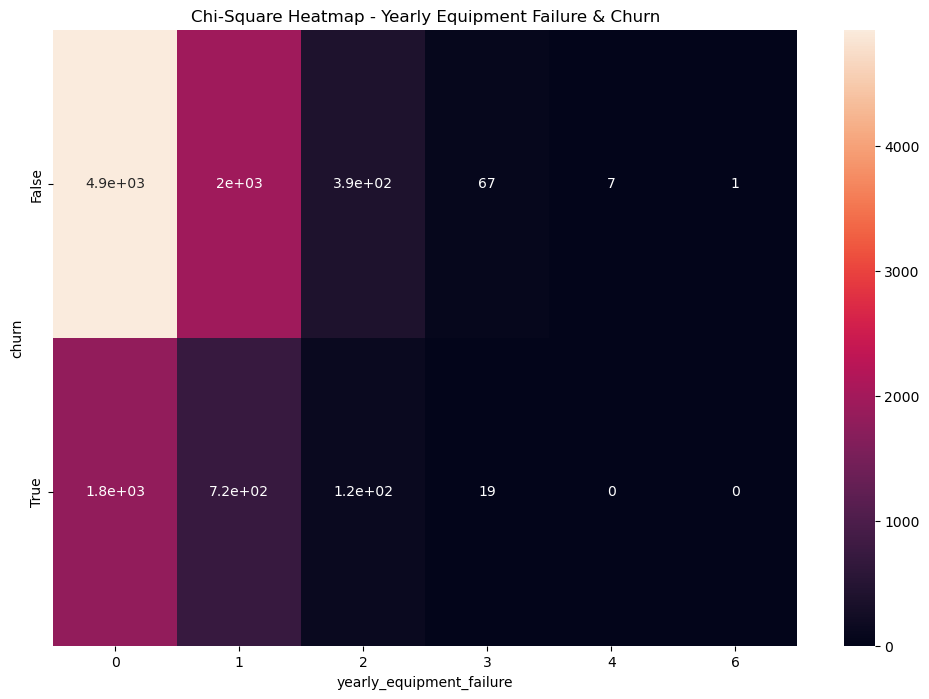

In [65]:
# Create heatmap of results
# (WGU Courseware)
plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=True);
plt.title('Chi-Square Heatmap - Yearly Equipment Failure & Churn')

#### Results

The chi-square test of independence returned a p-value of 0.226. This fails to reject the null hypothesis, meaning the `churn` rate and `yearly_equipment_failure` rate are independent. If the p-value were at or below the alpha threshold of 0.05, there would be statistically significant evidence that the two variables were related not at random. As we failed to reject the null hypothesis, any relationship between the two variables is random and independent.

## B3. Justification of Analysis Technique

I chose the chi-square test based on the type of variables I needed to answer my research question. `churn` is a categorical Boolean variable, indicating if a customer has churned in the last month or not. `yearly_equipment_failure` is a discrete numeric variable, measuring a count of how many times a customer has had to have their equipment reset or replaced in the last year. A t-test compares the means of two groups, checking to see if they are statistically different from each other, which does not apply to this question. An ANOVA test is appropriate when checking the statistical significance of means for three or more groups, which again does not apply to this research question.
The chi-square test is used to check the proportions of observed frequencies and the independence of the two variables.

## C1. Univariate Statistics

## D1. Bivariate Statistics